In [1]:
import keras
from keras.models import Sequential     # For initializing the Neural Net
from keras.layers import Conv2D  # 2D as we are dealing with images
from keras.layers import MaxPooling2D  # 2D pooling for images
from keras.layers import Flatten       # flattens the pooled image set 
from keras.layers import Dense         # Dense to bulid up layers
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# initializing the Convolution Neural Net
classifier = Sequential()

In [3]:
# Step 1 - Convolution
# nb_filter <- num of convo layers 
# featuremap_rows <- num of rows in feature map
# featuremap_cols <- num of cols in feature map
# input_sape <- expected shape of the input shape (256,256,3) for TensorFlow backend
# activation <- The function to pass the convoluted data, use ReLU to break linearity
# print(help(Conv2D))
classifier.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu'))

In [4]:
# Step 2 - Pooling 
# pool_size <- size of the Pool matrix, mostly take 2X2
# print(help(MaxPooling2D))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
# Adding Second Convolution Layer
classifier.add(Conv2D(64, (3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
# Adding Third Convolution Layer
classifier.add(Conv2D(64, (3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
# Step 3 - Flattening 
classifier.add(Flatten())

In [8]:
# Build up the Hidden Layer of the Neural Network 
classifier.add(Dense(units = 128, activation = 'relu'))

In [9]:
classifier.add(Dropout(0.5))

In [10]:
# Build up the Output Layer of the Neural Network 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [11]:
# Compiling the CNN
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Fitting the CNN to the images 
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Target size is the dimension that is expected by the CNN
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
# Training the CNN Model 
classifier.fit_generator(training_set,
                    steps_per_epoch=8000/batch_size, # Num of samples can be taken as steps
                    epochs=90,
                    validation_data=test_set,
                    validation_steps=2000/ batch_size, # Corresponds to num of samples in the test
                    workers = 12,
                    max_q_size = 100)

/Users/Mac-NB/Envs/AI/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=250.0, epochs=90, validation_data=<keras.pre..., validation_steps=62.5, workers=12, max_queue_size=100)`
  


Epoch 1/90
250/250 [==============================] - 212s - loss: 0.6775 - acc: 0.5606 - val_loss: 0.6860 - val_acc: 0.5750
Epoch 2/90
250/250 [==============================] - 165s - loss: 0.6315 - acc: 0.6401 - val_loss: 0.5929 - val_acc: 0.6905
Epoch 3/90
250/250 [==============================] - 162s - loss: 0.5923 - acc: 0.6814 - val_loss: 0.5579 - val_acc: 0.7270
Epoch 4/90
250/250 [==============================] - 159s - loss: 0.5582 - acc: 0.7212 - val_loss: 0.5034 - val_acc: 0.7560
Epoch 5/90
250/250 [==============================] - 155s - loss: 0.5200 - acc: 0.7445 - val_loss: 0.4865 - val_acc: 0.7695
Epoch 6/90
250/250 [==============================] - 154s - loss: 0.4899 - acc: 0.7654 - val_loss: 0.4335 - val_acc: 0.8010
Epoch 7/90
250/250 [==============================] - 154s - loss: 0.4673 - acc: 0.7794 - val_loss: 0.4441 - val_acc: 0.7840
Epoch 8/90
250/250 [==============================] - 155s - loss: 0.4508 - acc: 0.7902 - val_loss: 0.4506 - val_acc: 0.7855


250/250 [==============================] - 153s - loss: 0.1709 - acc: 0.9296 - val_loss: 0.3630 - val_acc: 0.8670
Epoch 67/90
250/250 [==============================] - 150s - loss: 0.1681 - acc: 0.9330 - val_loss: 0.3440 - val_acc: 0.8735
Epoch 68/90
250/250 [==============================] - 150s - loss: 0.1662 - acc: 0.9335 - val_loss: 0.3649 - val_acc: 0.8830
Epoch 69/90
250/250 [==============================] - 152s - loss: 0.1686 - acc: 0.9316 - val_loss: 0.3930 - val_acc: 0.8805
Epoch 70/90
250/250 [==============================] - 151s - loss: 0.1562 - acc: 0.9379 - val_loss: 0.5398 - val_acc: 0.8425
Epoch 71/90
250/250 [==============================] - 150s - loss: 0.1646 - acc: 0.9374 - val_loss: 0.3857 - val_acc: 0.8735
Epoch 72/90
250/250 [==============================] - 152s - loss: 0.1629 - acc: 0.9331 - val_loss: 0.3977 - val_acc: 0.8675
Epoch 73/90
250/250 [==============================] - 151s - loss: 0.1602 - acc: 0.9396 - val_loss: 0.3579 - val_acc: 0.8790
Epoc

In [14]:
classifier.save('model_test.h5')
import numpy as np
from keras.preprocessing import image

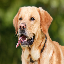

In [21]:
# Load image
test_single_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
test_single_image

In [22]:
# Converts the Image into an array
test_single_image = image.img_to_array(test_single_image)
test_single_image.shape

(64, 64, 3)

In [23]:
# Adding a new dimension to the image where axis is the position to specify the index
test_single_image = np.expand_dims(test_single_image, axis=0)

In [24]:
result = classifier.predict(test_single_image)
result

array([[ 1.]], dtype=float32)

In [25]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
def res_conversion(val):
    if val == 1:
        print("it is a Dog !! Woof woof")
    else:
        print("it is a Cat !! meowww")

res_conversion(result[0][0])

it is a Dog !! Woof woof


In [27]:
# importing saved model 
from keras.models import load_model

In [28]:
# Load pre-trained model
model = load_model('model_test.h5')
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

In [29]:
res_val = model.predict_classes(test_single_image)
res_conversion(res_val[0][0])

1/1 [==============================] - 0s
it is a Dog !! Woof woof
